## AMATH-581 Final Project: A Numerical Study of Algae Blooms

#### Clayton Strauch  
#### December 13, 2023

#### Introduction
Phytoplankton is a general term for a very large and diverse group of photosynthetic organims that includes algae (photosynthetic Eukaryotes), various protists, and certain types of baceteria such as cyanobacteria. In the marine environment, there is a delicate balance between these phytoplankton, other marine organisms, and the nutritional density in the water. When this balance gets tipped too far, it can cause what is known as an *algal bloom*. These are a short-lasting increase of phytoplankton that rapidly grows (almost exponentially) and rapidly depletes the nutrition in the water. Once the nutritional materials have been removed from the environment, the gigantic biomass that is the algal bloom decays, which extracts the dissolved oxygen from the water, which can be deadly for the abundant aerobic life in the surroudning waters. Some algae are also harmful to humans as some species produce harmful toxins.

Understanding algal blooms is thus crucial as they have been increasing in number over time and are thought to be correlated with global climate change. This report presents a simpole model of algal bloom dynamics between the algal growth and the water's nutrient density following the paper by Huppert et al. (2002). 

*Note that I will often refer to the phytoplankton as algae, even though that is not technically correct as algae is only one-component of what comprises an algae bloom. However, the terminology is commonly used this way*

Our model is a system of two coupled nonlinear first-order ODE's known as the Lotka-Volterra equations, which are commonly used to model a predator-prey model in biological systems. Rather than modeling a predator species and a prey species however, the model describes the algal bloom (int terms of biomass not organism count) and nutrient density (acting as prey here) over time $(t)$.

Our problem is an initial value problem as we know the values of $P(t=0)$ and $N(t=0)$ and we want to know the values at a later time.

Let $P(t)$ be the algal biomass, which represents the size of the algal population at time $t$ in a particular volume of the ocean.

Let $N(t)$ be the average nutrient density concentration in that same volume.

Several factors are involved in this model, which we will consider constant in this model for simplicity, as well as the fact that we are investigating the growth and decay of the algal bloom over a short period of time.

Our model: $ \quad \begin{cases} \dfrac{dP}{dt} = (\beta N - \gamma - \sigma)P \\
\dfrac{dN}{dt} = \rho(\gamma - \beta N) P - \alpha N + Q \end{cases}$

where $ \quad \begin{cases} 
\beta : \text{Nutrition uptake efficiency (dependent on environmental conditions like temperature and light)} \\
\rho : \text{The ratio of nutrient uptake and loss} \\
\gamma : \text{Biomass decay rate} \\
\sigma : \text{Nutrient loss related to the loss of algal bloom biomass (e.g. sinking, predation)} \\
\alpha : \text{Nutrient loss related to biogeochemical processes} \\
Q     : \text{Nutrient supply from external sources (e.g. preceipitation, rivers, seabed, etc.)}
\end{cases}$

Let's first code-up our parameters and time-span (250 days) as this will remain consistent regardless of ODE solver method.

In [14]:
# Python libraries used
import numpy as np
import matplotlib.pyplot as plt
from custom_helper_functions.custom_plotting_functions import time_plot, two_scales, mult_time_plot, pn_plot

In [ ]:
#Time Span #days
t0 = 0
tf = 250
dt = 0.5
t = np.arange(t0, tf+dt/2, dt)

Let f(x) be a function that returns the next values for $\dfrac{dP}{dt}$ and $\dfrac{dN}{dt}$ based off the current timestep value with our model parameters.

In [3]:
def f(x, alpha, beta, rho, gamma, sigma, Q):
    next_values = np.array([(beta * x[1] - gamma - sigma)*x[0],
                            rho*(gamma - beta * x[1])*x[0] - alpha*x[1] + Q])
    return( next_values )

Let's begin to solve our ODE system numerically with the simplest method we know -- Forward-Euler. 

This method is equal to: $x_{k+1} = x_k + \Delta t * f(x_k)$

We can code this up simply in a for-loop over our timespan.

In [4]:
# Forward-Euler Method
def forward_euler(t, P0, N0, alpha=0, rho=10**-3, gamma=0, sigma=0.1, betaN0 = 0.1, Q_N0 = 7.5e-3):
    # Model Parameters
    beta = betaN0 / N0
    Q = Q_N0 * N0
    # Construct base
    x = np.zeros((2,len(t)))
    x[0,0] = P0 # P_0
    x[1,0] = N0 # N_0
    # iterate over the time-span
    for k in range(len(t)-1):
        x[:,k+1] = x[:,k] + dt * f(x[:,k], alpha, beta, rho, gamma, sigma, Q)
    return(x)

Let's take a look at how this method performs over time with initial conditions: $ \quad \begin{cases}P(0) = 1\\
N(0) = 0.1\end{cases}$

*Note that all plotting functions can be found in the appendix of this project*

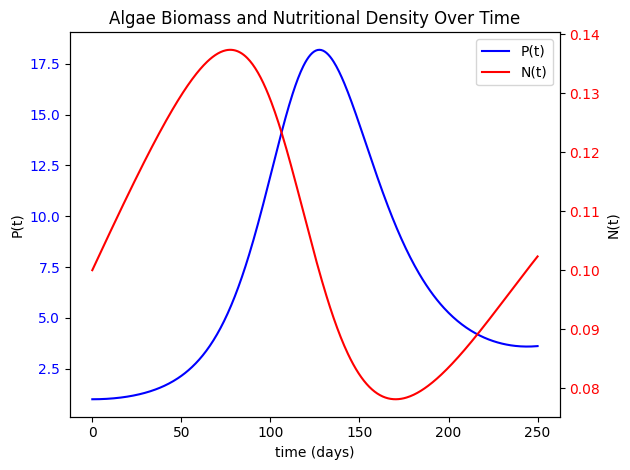

In [15]:
time_plot(forward_euler(t, P0=1, N0=0.1), t)

Even with this incredibly simple method, we can see adequate results of the system. The Lotka-Volterra system is known to be periodic in nature with "predators" and "prey" increasing and decreasing in population over time as predators consume prey.

Likewise, we see here that as the nutritional density $N(t)$ increases, the amount of algae $P(t)$ increases as well, which in turn causes the nutrtional density to fall, which causes the bloom to collapse and die.

This tells us that the model is behaving like the real-world phenomenon of algae-blooms, which is great! This is the goal of applied math and modeling, so this is definitely in the right direction.

We noticed that solution appears like it could be periodic, so let's take another look over a much larger time-span to investigate the long term behaviour of the model.

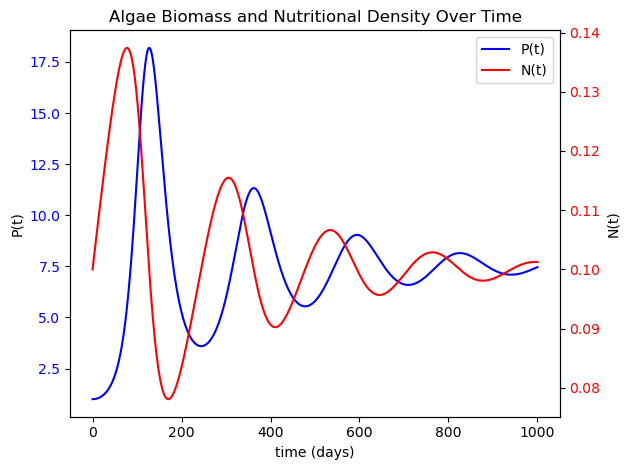

In [310]:
# Same parameter values and initial conditions, but larger timespan still at half day intervals
t_long = np.arange(t0, 1000+dt/2, dt)
time_plot(forward_euler(t_long, P0=1, N0=0.1), t_long)

Yep! The algae-blooms appear to occur periodically as the amount of nutritional matter and algae fluctuate up and down. The strength of the blooms appear to dissipate over time, which makes sense as the ecosystem self-adjusts itself back to equilibrium over time.

Now, let's take a look at the system over our original 250-day timespan, but with various increasing initial conditions for the algae $P(t)$ while we fix out N(0) value at 0.1.

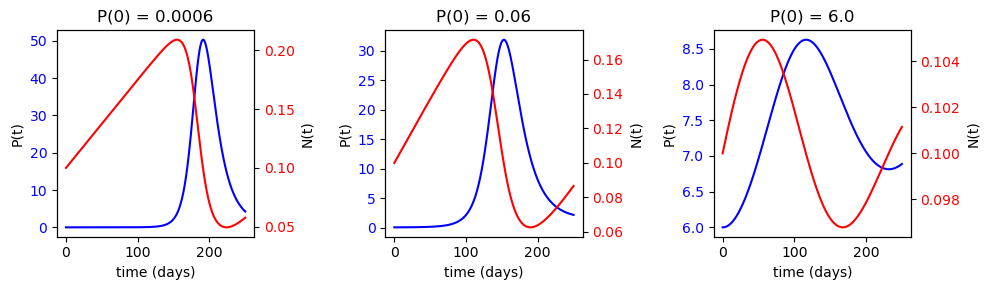

In [311]:
mult_time_plot(t, forward_euler(t, 6e-4, 0.1), forward_euler(t, 6e-2, 0.1), forward_euler(t, 6, 0.1))

This behavior makes sense as the same pattern we observed at first remains wehere the bloom grows over time as the nutrition increases and then dies off while depleting the nutrition. 

However, observe a very large difference in these graphs -- the peak value of $P(t)$ ! Notice the scales here where the larger the initial amount of algae, the smaller the peak bloom biomass will be. Let's plot those $P(t)$ values overlayed on the same scale to truly appreciate it:

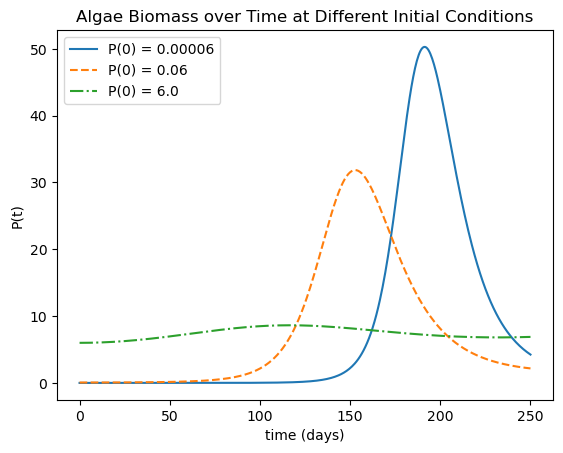

In [312]:
plt.plot(t, forward_euler(t, 6e-4, 0.1)[0], "-", label="P(0) = 0.00006")
plt.plot(t, forward_euler(t, 6e-2, 0.1)[0], "--", label="P(0) = 0.06")
plt.plot(t, forward_euler(t, 6, 0.1)[0], "-.", label="P(0) = 6.0")
plt.xlabel('time (days)')
plt.ylabel('P(t)')
plt.title("Algae Biomass over Time at Different Initial Conditions")
plt.legend()
plt.show()

Biologically, this makes sense because if the initial amount of algae is smaller at the beginning, the nutrition in the water is allowed to build up to much larger amount. When the algae catches up, there is so much food in the water, the bloom explodes in size! But it happens later on in time.

Overall despite the biological implications, this tells us that our ODE system is very depedndent on the initial condition of $P(t)$.

Since we have a system of two ODE's, we can also take a look at the phase-plane of $P(t)$ and $N(t)$ over a much larger time span to further investigate the system.

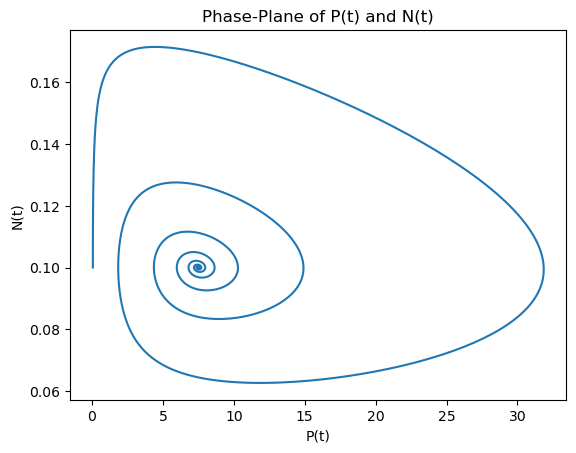

In [313]:
pn_plot(forward_euler(np.arange(t0, 2000+dt/2, dt), 0.06, 0.1))

It appears here that there is a fixed stability point for the system.
Luckily, Huppert et al. provided the equilibrium solutions for this system, which are: $\begin{cases}
N_{eq} = \dfrac{\gamma + \sigma}{\beta} \\
P_{eq} = \dfrac{Q - \alpha N}{\rho (\beta N - \gamma} \end{cases}$

Let's plot these functions over our phase plane.

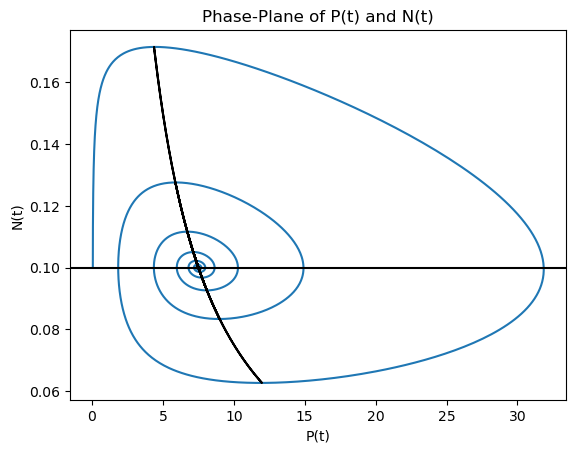

In [320]:
pn_plot(forward_euler(np.arange(t0, 2000+dt/2, dt), 0.06, 0.1), plot_eq=True)

The equilibrium solutions of the system show us right where the fixed point is.

Forward-Euler has done such a brilliant job at modeling this real-life system. Similar methods like various Runge-Kutta methods are also sure to work on this system as well, but sometimes the simplest solution is the best solution!

### Sources

Dronkers, J. (2023). Algal bloom dynamics. *Algal bloom dynamics - Coastal Wiki*. https://www.coastalwiki.org/wiki/Algal_bloom_dynamics#Appendix 

Huppert, A., Blasius, B., &amp; Stone, L. (2002). A model of phytoplankton blooms. *The American Naturalist*, 159(2), 156–171. https://doi.org/10.1086/324789 